Inladen van de libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

Initialiseren:

In [2]:
test_data = pd.read_csv('sign_mnist_test.csv')
train_data = pd.read_csv('sign_mnist_train.csv')

m = len(test_data)
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

index = np.random.randint(0, m)

labels = test_data['label'].values
images = test_data.iloc[:, 1:].values

Plotten van de images

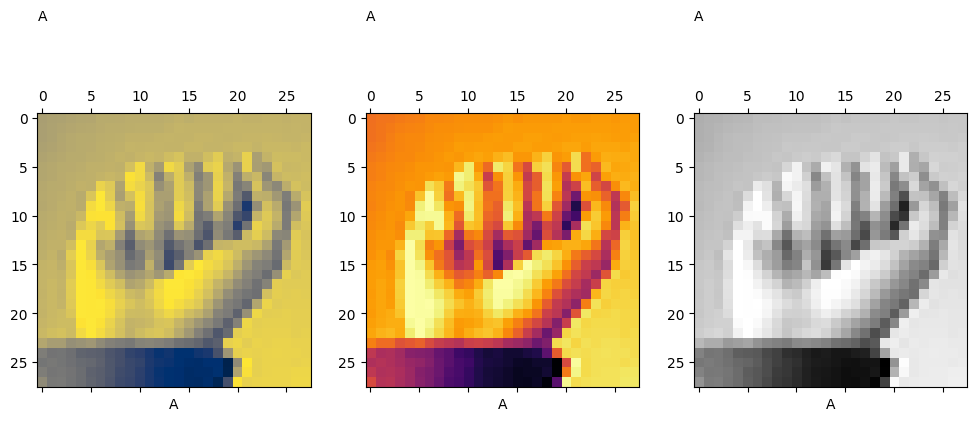

In [3]:
def plot_images(label, image):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    colormap = ['cividis', 'inferno', 'gray']
    image = np.reshape(image, (28, 28))

    for i in range(3):
        axes[i].matshow(image, cmap=colormap[i])
        axes[i].set_xlabel(alphabet[label])
        axes[i].text(0, -10, alphabet[label], ha='center')

    plt.show()

plot_images(labels[index], images[index])

Trainen van het model

In [4]:
X = images / 255.0  # Waarden omzetten tussen 0 en 1
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = keras.Sequential([
    keras.layers.Reshape((28, 28, 1), input_shape=(784,)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(26, activation='softmax')  # 26 klassen  (alphabet)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=6, validation_data=(X_test, y_test))

Epoch 1/6
180/180 [==============================] - 2s 10ms/step - loss: 2.4333 - accuracy: 0.3591 - val_loss: 1.4965 - val_accuracy: 0.6467
Epoch 2/6
180/180 [==============================] - 2s 10ms/step - loss: 0.9506 - accuracy: 0.7663 - val_loss: 0.6320 - val_accuracy: 0.8592
Epoch 3/6
180/180 [==============================] - 2s 10ms/step - loss: 0.3912 - accuracy: 0.9240 - val_loss: 0.2625 - val_accuracy: 0.9491
Epoch 4/6
180/180 [==============================] - 2s 10ms/step - loss: 0.1620 - accuracy: 0.9836 - val_loss: 0.1158 - val_accuracy: 0.9882
Epoch 5/6
180/180 [==============================] - 2s 10ms/step - loss: 0.0721 - accuracy: 0.9991 - val_loss: 0.0538 - val_accuracy: 1.0000
Epoch 6/6
180/180 [==============================] - 2s 10ms/step - loss: 0.0388 - accuracy: 0.9998 - val_loss: 0.0312 - val_accuracy: 1.0000


Plotten van de uitkomsten

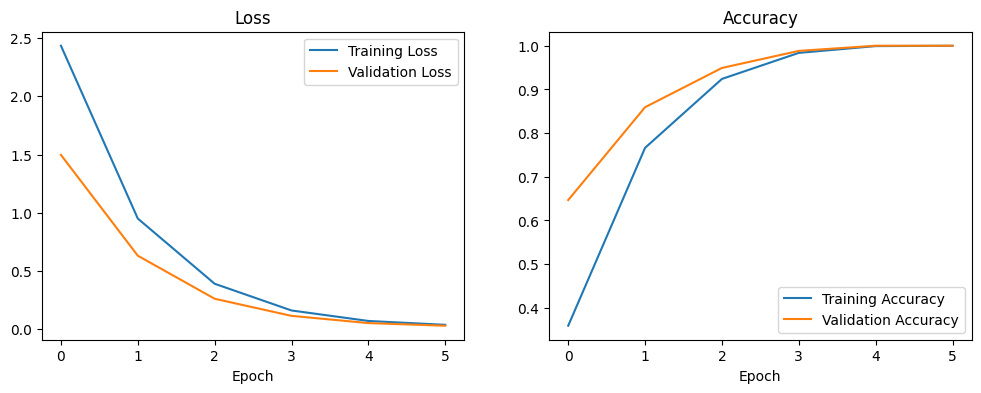

45/45 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 1.0000
Test Accuracy: 1.0


In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)